We will generate synthetic data to test the particle filter on. 

In [1]:
from filter_forecast.particle_filter.parameters import ModelParameters
from filter_forecast.particle_filter.transition import (
    Transition,
    OUModel,
    GaussianNoiseModel,
)
from jax.random import PRNGKey
import jax.numpy as jnp


def fun_beta(t):
    if 100 > t > 50:
        return 0.3
    return 0.1


days = 200
beta = fun_beta
pop = 100000
infected = 0.005 * pop
susceptible = pop - infected
initial_state = jnp.array([susceptible, infected, 0, 0, 0])
key = PRNGKey(0)

In [2]:
model_params = ModelParameters()

ou_model = OUModel(model_params)
gaussian_model = GaussianNoiseModel(model_params)

det_output = [initial_state.copy()]

In [3]:
def det_update(state, time_step):
    state += ou_model.det_component(state, 1, beta(time_step))
    return state


for i in range(1, days):
    det_output.append(det_update(det_output[-1], i))

In [4]:
import numpy as np
import matplotlib.pyplot as plt


def plot_output(output):
    data = np.array(output)
    labels = ["S", "I", "R", "H", "new_H"]
    # Create a plot for each variable
    plt.figure(figsize=(12, 6))

    # for each day
    for i in range(data.shape[1]):
        # plot each compartment
        plt.plot(range(data.shape[0]), data[:, i], label=labels[i])

    plt.title("SIRH Dynamics w/ Time-Dependent Beta")
    plt.xlabel("Day")
    plt.ylabel("Value")
    plt.legend(title="Variables")
    plt.show()

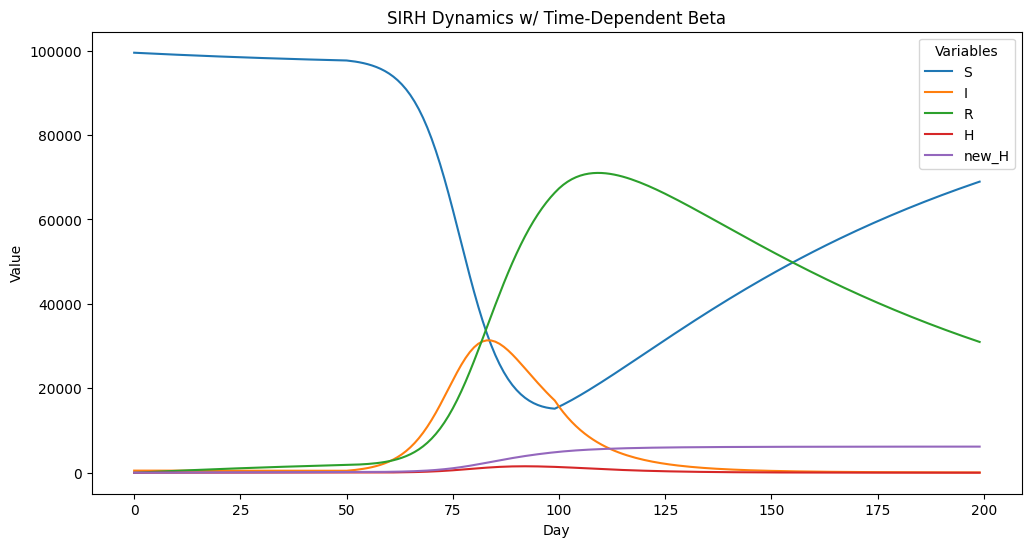

In [5]:
plot_output(det_output)

Testing the particle filter on this synthetic data.

In [6]:
# obs_data is an array of the new hospitalizations from synthetic data
data = np.array(det_output)
obs_data = data[:, 4]
print("new hospitalizations:", obs_data)

new hospitalizations: [0.00000000e+00 3.00000000e+00 5.99849987e+00 8.99535179e+00
 1.19904079e+01 1.49835253e+01 1.79745598e+01 2.09633732e+01
 2.39498253e+01 2.69337788e+01 2.99151001e+01 3.28936577e+01
 3.58693199e+01 3.88419609e+01 4.18114510e+01 4.47776680e+01
 4.77404861e+01 5.06997910e+01 5.36554604e+01 5.66073761e+01
 5.95554276e+01 6.24995041e+01 6.54394913e+01 6.83752823e+01
 7.13067703e+01 7.42338562e+01 7.71564331e+01 8.00744019e+01
 8.29876633e+01 8.58961258e+01 8.87996902e+01 9.16982651e+01
 9.45917587e+01 9.74800873e+01 1.00363159e+02 1.03240891e+02
 1.06113205e+02 1.08980011e+02 1.11841240e+02 1.14696808e+02
 1.17546638e+02 1.20390663e+02 1.23228806e+02 1.26060997e+02
 1.28887161e+02 1.31707245e+02 1.34521179e+02 1.37328903e+02
 1.40130341e+02 1.42925446e+02 1.45714157e+02 1.48496414e+02
 1.51815598e+02 1.55774185e+02 1.60493683e+02 1.66117905e+02
 1.72816772e+02 1.80790604e+02 1.90274857e+02 2.01545364e+02
 2.14923996e+02 2.30784500e+02 2.49558350e+02 2.71740143e+02
 2

In [7]:
from filter_forecast.particle_filter.init_settings import InitSettings

# Setup the PF inputs
init_settings = InitSettings(
    num_particles=10,
    population=pop,
    runtime=3,
    location_code="04",
    prediction_date="2024-07-17",
)

In [8]:
from filter_forecast.particle_filter.log_pf import run_pf

betas = run_pf(settings=init_settings, observation_data=obs_data, runtime=5)

Initial states shape: (10, 5)
States shape after initialization: (10, 5, 3)
States shape after setting initial states: (10, 5, 3)
Initial Betas: [0.10163847 0.12535435 0.10764288 0.11653985 0.13541396 0.13121975
 0.1197132  0.11001129 0.11554012 0.10327613]
Initial beta array (10, 3)
Iteration: 1 
Indices: [0 1 2 3 4 5 6 7 8 9]
Betas before: [[0.10163847 0.         0.        ]
 [0.12535435 0.         0.        ]
 [0.10764287 0.         0.        ]
 [0.11653985 0.         0.        ]
 [0.13541396 0.         0.        ]
 [0.13121974 0.         0.        ]
 [0.1197132  0.         0.        ]
 [0.11001129 0.         0.        ]
 [0.11554012 0.         0.        ]
 [0.10327613 0.         0.        ]]
Betas after: [[0.10163847 0.         0.        ]
 [0.12535435 0.         0.        ]
 [0.10764287 0.         0.        ]
 [0.11653985 0.         0.        ]
 [0.13541396 0.         0.        ]
 [0.13121974 0.         0.        ]
 [0.1197132  0.         0.        ]
 [0.11001129 0.         0.    

/home/andrew/Documents/code/PF_forecast/filter_forecast/particle_filter/particle_cloud.py:221: RuntimeWarning: divide by zero encountered in log
  new_betas = np.exp(np.random.normal(np.log(self.betas[:, t]),scale=np.sqrt(0.001)))
